# Summary

- curve in color-mag relation
    - starts curving back at late times, when system getting brightest it's been
    - interesting slightly separate feature from beginning of LC

# Outline
- 1: Sequence of Three Auto Functions that Inform Further Search
- 2: Look for Orbital Period with Periodograms
- 3: Look for Orbital Period with LC
- 4: Look for Super-Orbital Period with Periodograms
- 5: Look for Super-Orbital Period with LC

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import LombScargle
from scipy import signal
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize
# from lmfit.models import GaussianModel
import glob
from astropy.table import Table,join,vstack,unique
from importlib import reload
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import ogle as o #module

blue = 'cornflowerblue'
navy = 'navy'
purple = 'rebeccapurple'
pink = '#CF6275'
maroon = 'maroon'

In [2]:
#change src number here
num = 12
cross = Table.read('sourcefiles.csv')
full = Table.read('smc_x_m03_zar_match_OGLE_v2.ascii',format='ascii')
orb = float(cross[cross['src_n']==num]['Porb'])
orb

77.2

In [3]:
full[full['src_n']==num]

src_n,OGLE,RA_OGLE,DEC_OGLE,ra_deg,dec_deg,perr,period,Porb,_RAJ2000_1,_DEJ2000_1,__M2002_,Vmag_1,Separation_1,_RAJ2000_2,_DEJ2000_2,Vmag_2,recno,Separation
int64,str38,str11,str11,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64
12,SMC720.28 \#40399,00:49:13.61,-73:11:37.8,12.327084,-73.20028,40.0,9.13,77.2,--,--,--,--,--,12.327989999999996,-73.20025,19.298,1948587,0.9489752841771532


- spin period: 

# 1: Sequence of Three Auto Functions that Inform Further Search

orbital period: 77.2


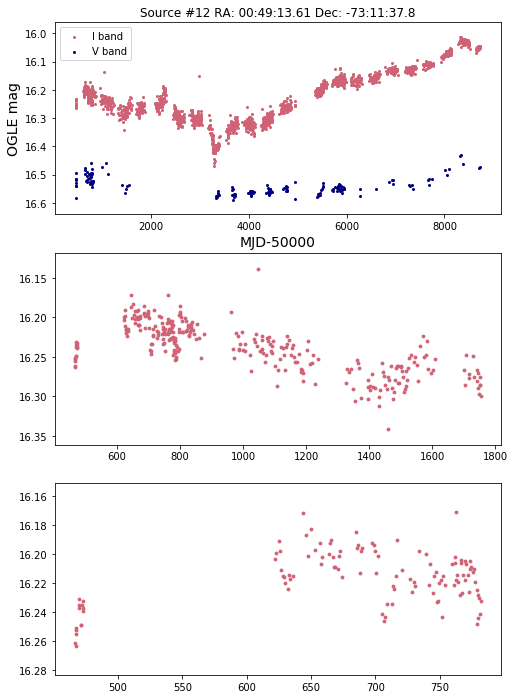

In [4]:
ilist,vlist = o.getIV(num,cross,plot=True,zooms=True,figsize=(8,12),mult=(3,8),offset=10,stack=False) #sometimes good to adjust offset
iband,vband = vstack(ilist),vstack(vlist)

In [5]:
idays = iband['MJD-50000']
imag = iband['I mag']
ierr = iband['I mag err']

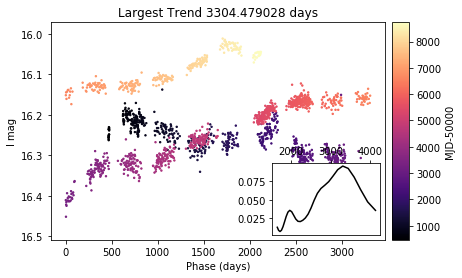

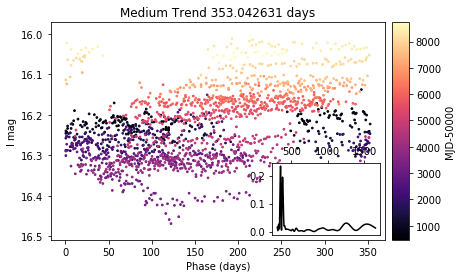

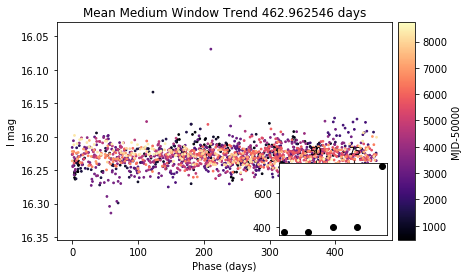

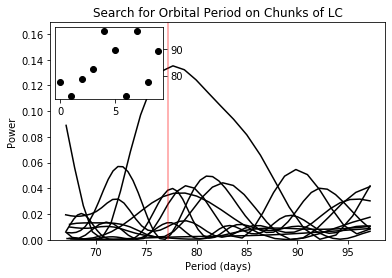

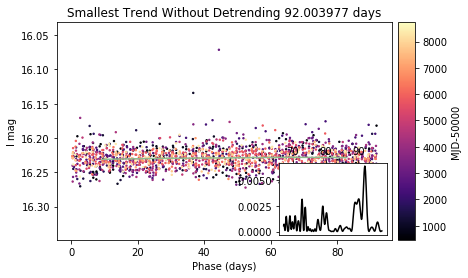

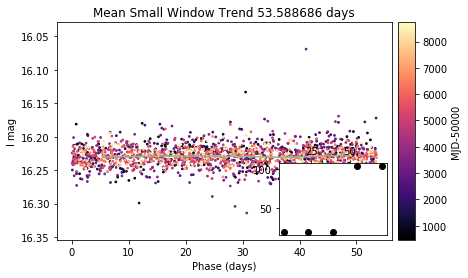

In [6]:
o.autopd(iband,orb,plotpd=True,plotphase=True,printall=False,ctime=True,orb_bounds=(10,20),cutlc=True,numcuts=10,plotdet=True,pbins=5,saveall=False,srcnum=num)

- established period strongest overall/peak for one chunk of LC

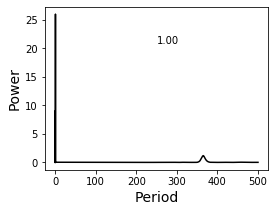

In [10]:
#window function -- add to template?
reload(o)
freq,power,bp = o.periodogram(iband,wfunc=True,maxp=500,minp=0.1,more=True)
pf = o.findpeaks(freq,power,pkorder=True,distance=200)

peak at 365 days, so be aware of that when looking for superorbital trend

I and V-I correlation: -0.932428467980274
V and V-I correlation: -0.2515816687525331


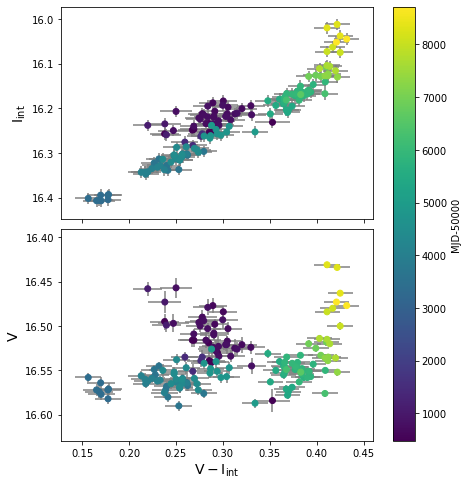

In [13]:
reload(o)
interp = o.colormag(iband,vband,ctime=True,retint=True) 

(16.499000000000002, 15.982000000000001)

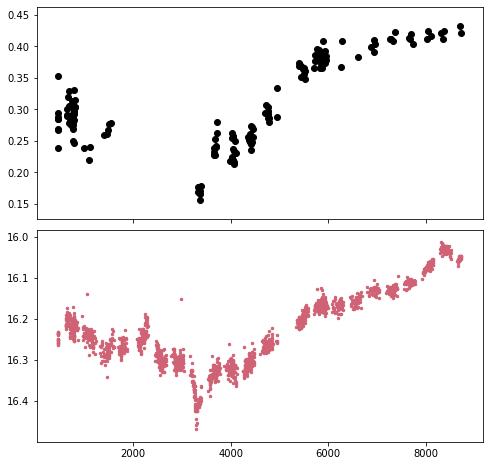

In [14]:
#V-I vs time over I mag lc
fig,ax = plt.subplots(2,1,figsize=(8,8),sharex=True)
ax[0].scatter(vband['MJD-50000'],vband['V mag']-interp,color='black')
# plt.colorbar(label=('I mag'))
ax[1].scatter(idays,imag,color=pink,s=6)
plt.subplots_adjust(hspace=0.05)
maxi,mini = np.max(imag),np.min(imag)
ax[1].set_ylim(maxi+.03,mini-.03)

# 2: Look for Orbital Period with Periodograms

first look for low periods and use for aliases

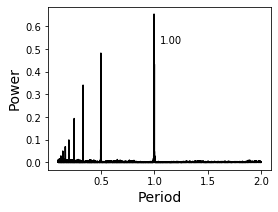

In [15]:
freq,power,bp = o.periodogram(iband,minp=0.1,maxp=2,more=True)
pf = o.findpeaks(freq,power,pkorder=True)

many aliases around ~300 days, but none near orbital period

In [16]:
#find aliases using top ten periods above
alias = o.aliasarr(pf['period'],nrange=4)
alias[alias>2]

array([  123.47006662,   186.44721978,    92.08934616,   349.92463818,
       11946.86522674,   186.45744562,   123.29027734,   380.59380012,
        8211.31383845,    90.28031822,   173.16867024,   378.89066576,
         179.57702199,   380.76430672,   330.39973052,   120.06918485,
         353.02430109, 10342.2041851 ,   179.19695978,   410.98001141])

by OGLE epoch then dense regions (but can be broken up by >20 days)

In [18]:
len(ilist)

3

start ind: 0, end ind: -1
start ind: 0, end ind: -1
start ind: 0, end ind: -1


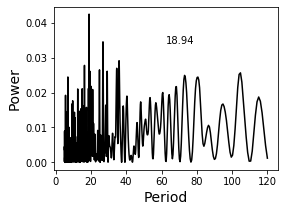

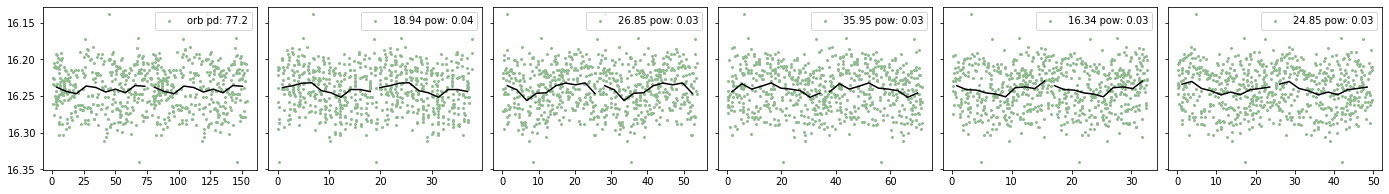

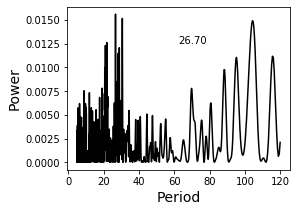

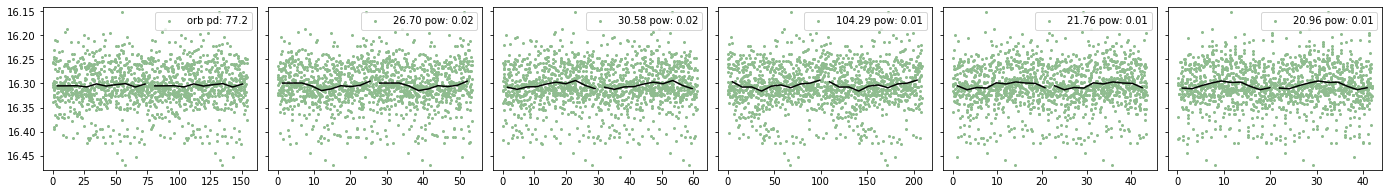

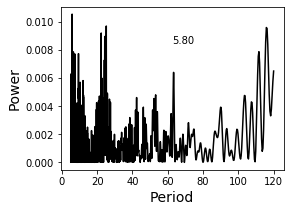

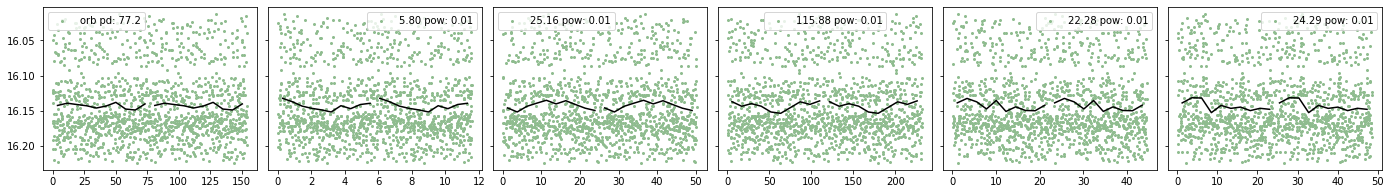

In [19]:
#without detrending
#always get high peak at exactly one day b/c of observing
for i in ilist:
    df,pks = o.multiphase(i,orb=orb,dense=False,minp=5,maxp=120,plotpd=True)

above method did not return established period
- but each OG gave different result
- many peaks in periodogram

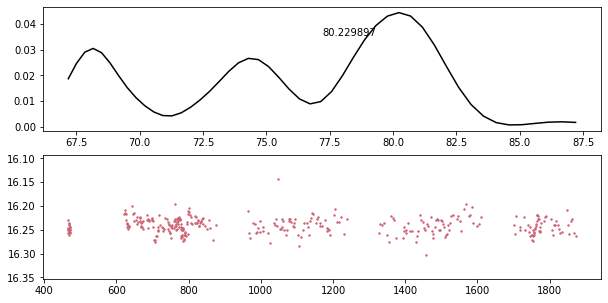

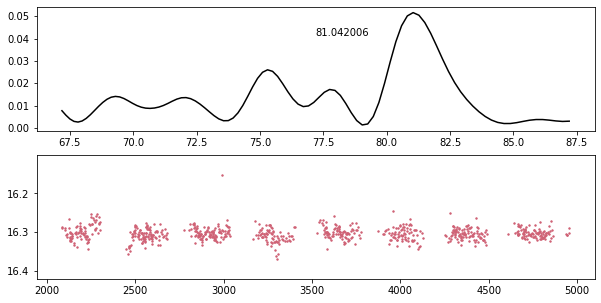

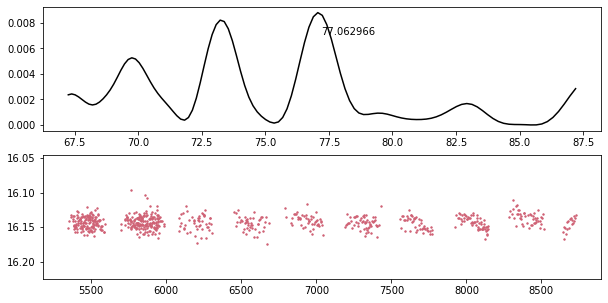

In [21]:
#detrending each OGLE epoch
#varies just a bit based on window
reload(o)
for i in ilist:
    o.knownorb(i,orb,lower=10,upper=10,window=51,cutdata=False,cut1=0,cut2=500,plotdet=True,figsize=(10,5),samples=20)


one detrended, close search result close to established period: 77.1 days, while established is 77.2
- other searches within ten days of established return ~80 days with wide peaks


**separate into regions**

start ind: 18, end ind: 348


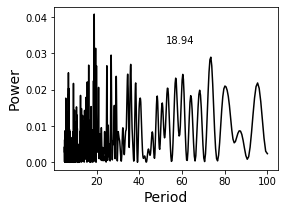

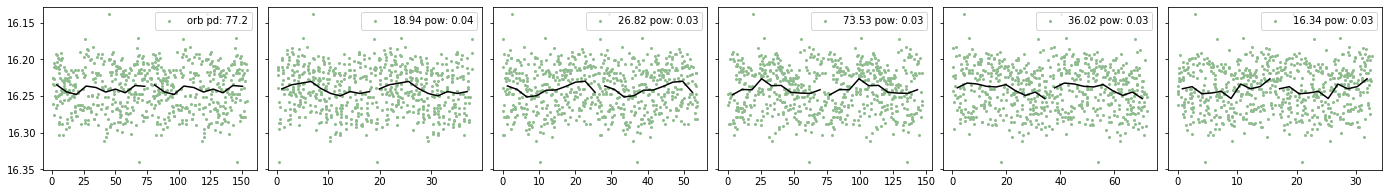

In [25]:
#search and fold with densest region (max space up to 50 points)
df,pks = o.multiphase(iband,orb=orb,dense=True,maxspace=100,minp=5,maxp=100,plotpd=True,sigma=10)

interestingly, 77.2 seems to give nultiple peaks 
- one nearby peak: 73.53

In [26]:
dense,mdense = o.finddense(iband,maxspace=100,retall=True)

looks like LC chunks will be helpful in confirming/denying established period

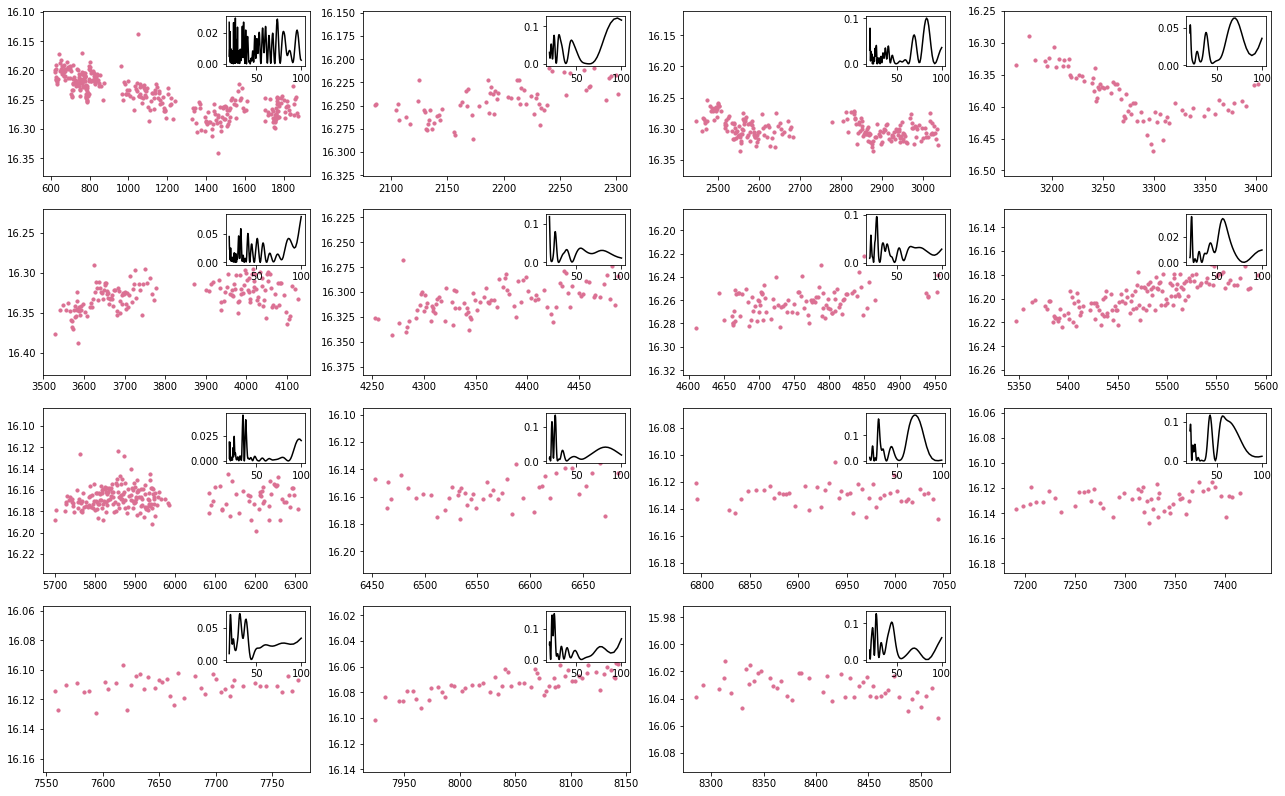

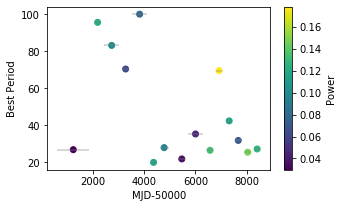

In [29]:
bps,maxpows,stdate,endate = o.denselcpd(iband,dense,minp=20,maxp=100,plotbest=True,onlybp=True)

In [30]:
bps

[26.82317788328793,
 95.56824436133327,
 83.13700142243609,
 70.38047699042897,
 100.0,
 19.979323338177625,
 27.93478036083814,
 21.820801354376414,
 35.30214954061813,
 26.486796781743593,
 69.49688269233158,
 42.36650366342075,
 31.81344312199088,
 25.460200568897037,
 27.197735389272353]

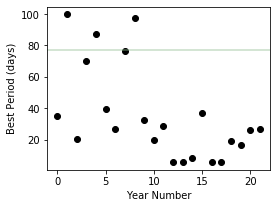

In [33]:
years,bps = o.yrpd(iband,minp=5,maxp=100,orb=orb,plotbest=True,det=False,window=91)

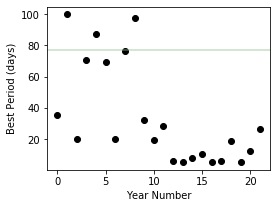

In [34]:
# repeat with detrending -- nearly same result since large window
years, bps = o.yrpd(iband,minp=5,maxp=100,orb=orb,plotbest=True,det=True,window=91)

In [35]:
bps

[35.14206936100709,
 100.0,
 20.25322389681336,
 70.39835076005194,
 87.21742738454844,
 69.2891971238335,
 19.914184867594344,
 76.44434547262566,
 97.33315696611402,
 32.546735290701264,
 19.629117353844993,
 28.514509512126452,
 5.902398093342644,
 5.478550254661573,
 7.95392497732591,
 10.417215903819981,
 5.417635492463856,
 5.961671031132084,
 18.64001407589549,
 5.129825775725699,
 12.695318410569667,
 26.609434529177232]

# rolling search

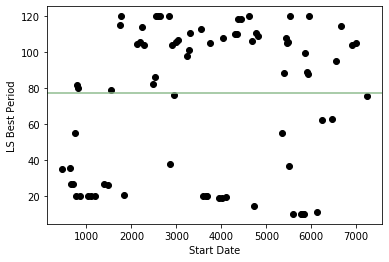

In [37]:
ps,pows,bps,st = o.rollpd(iband,npoint=200,nroll=20,det=False,minp=10,maxp=120,plot=False)
plt.scatter(st,bps,color='black')
plt.ylabel('LS Best Period')
plt.xlabel('Start Date')
plt.axhline(orb,color='darkseagreen')

# 3: Look for Orbital Period with LC


In [ ]:
orb

In [ ]:
#identify reliable flare center to use for cen

def checkorb(st,end,cen=5797.4,orb=orb,plcen=False,figsize=(10,4)):
    stday = idays[st:st+1]
    enday = idays[end-1:end]
    fig = plt.figure(figsize=figsize)
    plt.errorbar(idays[st:end],imag[st:end],yerr=ierr[st:end],linestyle='none',marker='o',color=pink,markersize=5)
    maxi,mini = np.max(imag[st:end]),np.min(imag[st:end])
    plt.ylim(maxi+.02,mini-.02)

    fline = int((stday - cen)/orb)
    lline = int((enday - cen)/orb)
    for i in range(fline-1,lline+2):
        plt.axvline(cen+orb*i,alpha=0.2)
    if plcen: plt.axvline(cen,alpha=0.6)
checkorb(870,1000,plcen=True)

In [ ]:
def orbsub(inds,cen=5797.4,cenerr=0.4,pd=orb,pderr=0.5,span=True,plcen=False,figsize=(22,30)):
    '''Separate full LC into subplots to better see orbital period timescale
    st,end are lists or arrays of start and end indices of each subplot
    cen: center of flare from which vertical lines are spaced (identify manually)
    add table/columns as arguments if moving to ogle.py'''
    sts = inds[:-1]
    ends = inds[1:]
    
    fig = plt.figure(figsize=figsize)
    rows = int(len(sts)/2)
    if len(sts)%2 == 1: rows+=1
    
    for i in range(len(sts)):
        st,end = sts[i],ends[i]
        #start at 1 for adding subplot
        ax = fig.add_subplot(rows,2,i+1)    
        tot = idays[end-1:end] - idays[st:st+1]
        stday = idays[st:st+1]
        enday = idays[end-1:end] 
    
        ax.errorbar(idays[st:end],imag[st:end],yerr=ierr[st:end],linestyle='none',marker='o',color=pink,markersize=5)
        maxi,mini = np.max(imag[st:end]),np.min(imag[st:end])
        ax.set_ylim(maxi+.02,mini-.02)
        if plcen: ax.axvline(cen)
        fline = int((stday - cen)/pd)
        lline = int((enday - cen)/pd)
        for i in range(fline-1,lline+1):
            #propogate error of ~3 days and 1 day on period
            if span and i<4: ax.axvspan(cen-cenerr+(pd-pderr)*i,cen+cenerr+(pd+pderr)*i,color='darkseagreen',alpha=0.4)
            ax.axvline(cen+pd*i,color='darkseagreen',alpha=0.6)

    return

In [ ]:
#list of inds to use -- easy to manipulate
#can also use finddense to not have large gaps, but then harder to control number of plots
inds = np.arange(0,len(iband),150)
orbsub(inds)

In [ ]:
def checkpds(st,end,pd1=orb,pd2=orb+1,det=False,window=7,pbins=10):
    fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
    ttab = iband[st:end]
    if det:
        o.detrend(ttab,window=window)
        mag = ttab['I detrend']
    else: mag = ttab['I mag']
    days = ttab['MJD-50000']
    ax[0].scatter(days%pd1,mag,color=pink,label=str(pd1)+'d',s=6)
    ax[1].scatter(days%pd2,mag,color=pink,label=str(pd2)+'d',s=6)
    ax[0].scatter(pd1+days%pd1,mag,color=pink,s=6)
    ax[1].scatter(pd2+days%pd2,mag,color=pink,s=6)
    maxi,mini = np.max(mag),np.min(mag)
    ax[0].set_ylim(maxi+.01,mini-.01)
    plt.subplots_adjust(wspace=0.05)
    ax[0].legend()
    ax[1].legend()
    
    mid,avg = o.meanphase(ttab,pd1,det=det,pbins=pbins)
    ax[0].plot(mid,avg,color='black',label=str(pd)+'d')
    ax[0].plot(pd1+mid,avg,color='black')

    mid,avg = o.meanphase(ttab,pd2,det=det,pbins=pbins)
    ax[1].plot(mid,avg,color='black',label=str(pd2)+'d')
    ax[1].plot(pd2+mid,avg,color='black')
checkpds(0,60)

In [ ]:
o.phasestep(iband,orb,20,det=False,med=False,double=True,color='black',err=False,retall=False,epoch=0,label='')

# 4: Look for Super-Orbital Period with Periodograms

In [ ]:
#each OGLE epoch
for i in ilist:
    o.periodogram(i,maxp=1000)


In [ ]:
#full LC
df,pks = o.multiphase(iband,orb=orb,incl_orb=False,dense=False,minp=100,maxp=1000,plotpd=True)

# 5: Look for Super-Orbital Period with LC

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(idays,imag,color=pink,s=8)

maxi,mini = np.max(imag),np.min(imag)
plt.ylim(maxi+.05,mini-.05)

#add any known (Type II) outbursts

# Add to Summary Table

In [ ]:
#read in summary table
summ = pd.read_csv('summtab.csv')

In [ ]:
#automatic additions
o.addtotable(iband,vband,summ,num,interp)

In [ ]:
#grab row for source
row = summ[summ['src_n']==num]
row

In [ ]:
#manual categorical additions


In [ ]:
#write out table
summ.to_csv('summtab.csv',index=False)